# Sentiment Analysis of Restaurant Reviews
Проект для портфолио: определение, положительный отзыв или отрицательный.
Используем Python, pandas, scikit-learn и NLP.

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Скачивать стоп-слова
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [ ]:
# Загружать данные
df = pd.read_csv("Restaurant_Reviews.tsv", sep="\t")
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
ps = PorterStemmer()
corpus = []

for review in df['Review']:
    # Удалять всё кроме букв
    text = re.sub('[^a-zA-Z]', ' ', review)
    text = text.lower()  # в нижний регистр
    words = text.split()
    words = [ps.stem(word) for word in words if word not in stopwords.words('english')]
    text = ' '.join(words)
    corpus.append(text)

# Проверять первые 5 обработанные отзывы
corpus[:5]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price']

In [6]:
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = df['Liked'].values  # 1 = положительный, 0 = отрицательный

print("Размерность X:", X.shape)

Размерность X: (1000, 1500)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = MultinomialNB()
model.fit(X_train, y_train)

# Предсказания
y_pred = model.predict(X_test)

Accuracy: 0.74

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.75      0.74        96
           1       0.76      0.74      0.75       104

    accuracy                           0.74       200
   macro avg       0.74      0.75      0.74       200
weighted avg       0.75      0.74      0.75       200



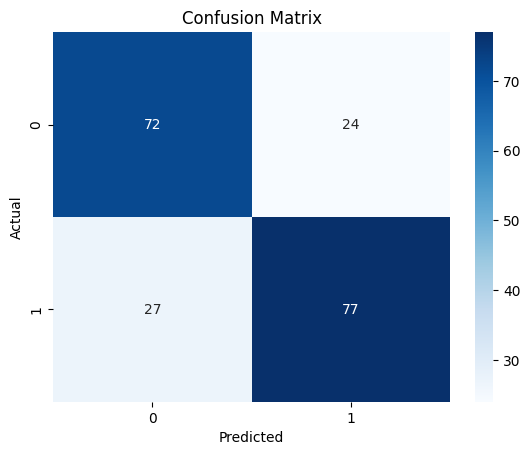

In [9]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Матрица ошибок
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [19]:
def predict_sentiment(review):
    text = re.sub('[^a-zA-Z]', ' ', review)
    text = text.lower().split()
    text = [ps.stem(word) for word in text if word not in stopwords.words('english')]
    text = ' '.join(text)
    vect = cv.transform([text]).toarray()
    pred = model.predict(vect)[0]
    return "Positive ^_^" if pred == 1 else "Negative T_T"

# Пример
sample_review = "Ts is not tuff"
print(f"Review: '{sample_review}' → Sentiment: {predict_sentiment(sample_review)}")

Review: 'Ts is not tuff' → Sentiment: Negative T_T
